# Importando bibliotecas

In [452]:
import pandas  as pd


from sklearn.tree             import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import ConfusionMatrixDisplay
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import precision_score, recall_score
from sklearn.metrics          import f1_score
from sklearn.metrics          import RocCurveDisplay
from sklearn.metrics          import roc_auc_score
from sklearn.metrics          import PrecisionRecallDisplay
from sklearn.metrics          import average_precision_score
from sklearn.metrics          import classification_report
from sklearn.model_selection  import cross_validate, KFold
from sklearn.model_selection  import StratifiedKFold
from imblearn.over_sampling   import SMOTE
from imblearn.pipeline        import Pipeline as imbpipeline
from imblearn.under_sampling  import NearMiss
from imblearn.under_sampling  import NearMiss


# Importando os dados

In [453]:
dataset = '/Users/fernanda/Library/Mobile Documents/com~apple~CloudDocs/alura/_validacao_de_modelos/emp_automovel.csv'
dados = pd.read_csv(dataset)
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


# Conhecendo o dataset

Trata-se de um banco de dados de uma empresa de empréstimo de automóveis. 

Ela está com uma alta demanda para uma frota reduzida e uma alta taxa de clientes inadimplentes, ou seja, clientes que não pagam o empréstimo no tempo devido.

Este fato está gerando um grande prejuízo para a empresa.
Nosso objetivo é identificar esses clientes inadimplentes antes mesmo da empresa conceder o empréstimo do veículo.

**Colunas:**
- receita_cliente
- anuidade_emprestimo
- anos_casa_propria
- telefone_trab
- avaliacao_cidade
- score_1/score_2/score_3/score_social
- troca_telefone	
- inadimplente: sendo 1 para cliente pagou o emprestimo no tempo acordado e 0 para cliente nãoo pagou o emprestimo no tempo acordado

# Preparando dados para o Modelo


### Separando as variáveis explicatórias(x) e dependente/alvo(y)

In [454]:
x = dados.drop('inadimplente', axis =1) #todas as colunas menos a 'inadimplente"
y = dados['inadimplente']

### Separando dados de treino, validação e teste 

In [455]:
#dados de teste
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

#dados de treino e validação 
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

print(f'O treino foi realizado com {len(x_treino)} elementos.')
print(f'A validação foi realizada com {len(x_val)} elementos.')
print(f'O teste foi realizado com {len(x_teste)} elementos.')

O treino foi realizado com 34440 elementos.
A validação foi realizada com 11481 elementos.
O teste foi realizado com 8104 elementos.


# Modelo: DecisionTreeClassifier

### Treinando o modelo 

In [456]:
#treinando o modelo com dados de treino
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=10)

# Métricas

### Acuracia de treino 

In [457]:
modelo.score(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')

Acurácia de treino: 0.9205865272938444


### Acuracia de validação  

In [458]:
modelo.score(x_val, y_val)
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')


Acurácia de validação: 0.9057573382109573


### Matriz de confusão

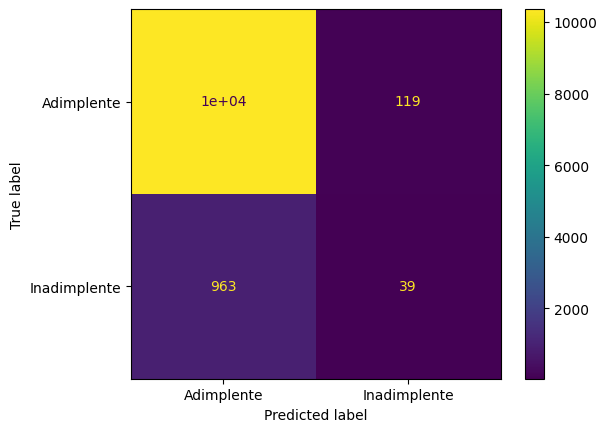

In [459]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)

# plotando e configurando as lables do gráfico 
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

No gráfico acima vemos que o modelo que temos teve o desempenho:
- Dos clientes que o modelo disse que iriam pagar (Adimplentes) ele acertou 10.000 e errou 961.

- Dos clientes que o modelo disse que  NÃO iriam pagar (Inadimplentes) ele acertou 41 e errou 121.

Neste caso **o modelo está errando muito** pois em um total de inadimplentes reais (961 + 41 = 1002 pessoas) o modelo só identificou 41 dessas, mesmo com uma acurácia de acima de 90%. 

### Acurácia

In [460]:
accuracy_score(y_val, y_previsto)
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9057573382109573


### Precision 

- Considera somente os valores **previsto** pelo modelo que representam a presença da característica (Inadiplência).

In [461]:
precision_score(y_val, y_previsto)
print(f'Precisão: {precision_score(y_val, y_previsto)}')

Precisão: 0.2468354430379747


### Recall

- Considera somente os valores **reais** que representam a presença da característica (Inadiplência).

In [462]:
recall_score(y_val, y_previsto)
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.038922155688622756


Tendo em vista que os melhores resultados são os que se aproximam de 1, os valores das métricas Precision(0.26) e Recall(0.04) estão muito abaixo do esperado mostrando que o modelo realmente não está desempenhando um bom papel.

Sendo assim, o que precisamos fazer é escolher qual métrica desejaremos avançar neste caso.  

No caso do recall são observados os valores **reais** dos clientes que não pagaram. 
 É a quantidade de clientes que não pagaram, mas a maaquina disse que iriam pagar (ou seja, a maquina errou). Qt maior a quantidade de clientes que não irão pagar e que a máquina disse que pagaria (falso positivo) maior é a possibilidade da empresa tomar um prejuizo pois vai vender pra alguém que corre risco alto de não pagar. Essa métrica deveria ser melhorada.

Já na Precision são os valores **estimados** pela máquina, em que a máquina acertou que vão vao pagar. Nesse caso é muito mais importante nao vender para os que nao vao pagar do que acertar na mosca os que vao pagar. A métrica escolhida foi a **Recall**.


### F1 (equilíbrio entre precision e recall)

In [463]:
f1_score(y_val, y_previsto)
print(f'F1-score: {f1_score(y_val, y_previsto)}')


F1-score: 0.06724137931034484


## Gráficos construídos a partir do Recall

### Curva ROC (só podemos utilizar em classificação binária)

**1)** Quando a curva estiver mais próxima do canto superior esquerdo (próximo do 1 no eixo y) melhor o modelo.

**2)** Quando a curva estiver mais próxima de uma linha diagonal pior é o modelo, pois isso indica que ele está prevendo aleatoriamente e com pouca inteligência.

**3)** Quando o AUC for mais próximo de 1 melhor o resultado e quanto mais próximo de 0.5 pior o resultado.

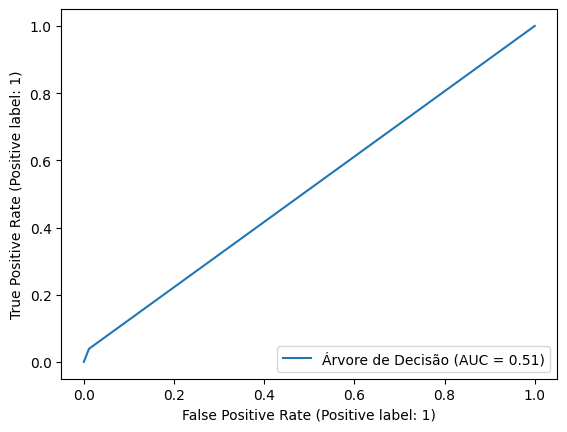

In [464]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');


### Avaliando a métrica AUC

In [465]:
roc_auc_score(y_val, y_previsto)
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')


AUC: 0.5137830551322206


### Curva se precisão X recall

**1)** Quando a curva estiver mais próxima do canto superior direito (próximo do 1 no eixo y) melhor o modelo e quanto mais perto do do 0 pior é o modelo.

**2)** Quanto mais próximo de zero for a mátrica AP(averege precision) pior é o modelo.

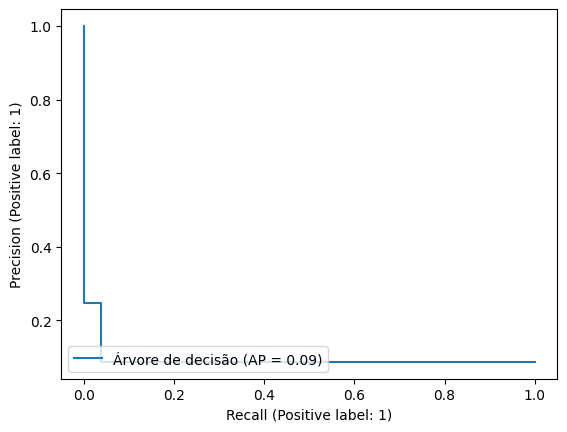

In [466]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

### Avaliando a métrica AP 

In [467]:
average_precision_score(y_val, y_previsto)
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09348507854417813


### Resumo das principais métricas

In [468]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## Validação cruzada

- Dividindo os dados de treinamento e validação em 5 partes para retreinar o modelo.

### KFold

In [469]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.13066316, 0.12412214, 0.12004924, 0.11953163, 0.11713409]),
 'score_time': array([0.0016439 , 0.00170779, 0.00156093, 0.00149608, 0.00136399]),
 'test_score': array([0.91257485, 0.90722997, 0.90777439, 0.91365418, 0.89928136])}

In [470]:
#média, o desvio padrão e criar o intervalo de confiança
cv_resultados['test_score']
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.897924360497246, 0.9182815378106679]


- Função para criar o modelo de confiança

In [471]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


In [472]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [473]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.12095785, 0.11708379, 0.11702609, 0.11623669, 0.11673594]),
 'score_time': array([0.00253892, 0.00234008, 0.00233698, 0.00234532, 0.00234079]),
 'test_score': array([0.02642008, 0.01732673, 0.01845018, 0.0156658 , 0.02427746])}

In [474]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012088672107232948, 0.02876742766372565]


### Estratificando os dados 

In [475]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [476]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [477]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020534291999571, 0.03583726350617151]


### Balanceando os dados (gerando novos dados com padrão bem próximo aos já existentes) Mas não é correto

- Oversampling com o método SMOTE

In [478]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [479]:
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

- Treinando o modelo com dados balanceados

In [480]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [481]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7056058681522579, 0.7475827312313499]


- Pipeline para validação (forma correta)

In [482]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [483]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [484]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.20042442805772712, 0.2944650648143374]


- Undersampling NearMiss
(retirar dados - de forma aleatória- da classe que tem mais dados para balancear )

In [485]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [486]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [487]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.626090417932067, 0.6969166710869585]


- Método escolhido: Undersampling NearMiss 

In [488]:
#Aplicando o método Undersampling NearMiss para toda a base de dados
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [489]:
#Treinando e testando modelo com os dados de TESTE
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [490]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



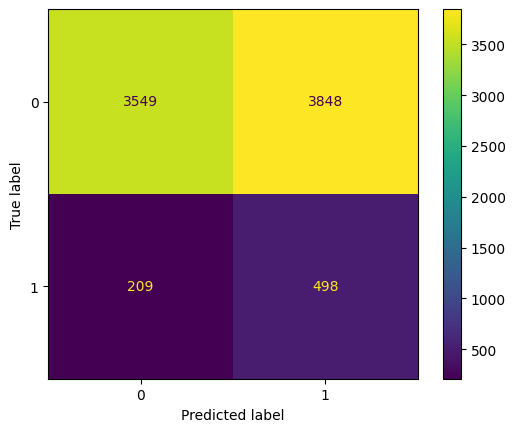

In [491]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);